## 분류의 기초(Classification)
- 확률론적인 방법론(조건부 확률을 이용)과 비확률론적 방법론으로 크게 방법이 나뉜다.
- 확률론적 방법론: 조건부 확률을 이용
    - 생성모형 : joint probability를 구해서 조건부 확률을 계산
    - 판별모형 : P(y=C1|x)=f(x), 조건부확률이 어떠한 함수의 형태를 띈다고 가정하고 함수를 찾는다
- 비확률론적 방법론
    - 판별함수(discriminant function) : 영역이 나뉘는 경계면(f(x))을 정의한다.(boundary plane)

### QDA
- 생성모형의 하나, 두 클래스 중에서 어디에 속하는 지를 확률로 보여줌
- 각 클래스에 속할 확률을 보여준다.

In [3]:
%matplotlib inline

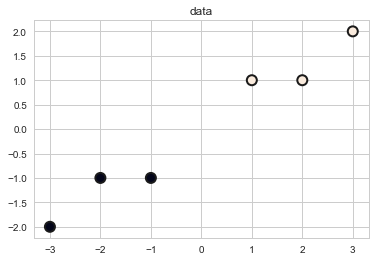

In [4]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.title("data")
plt.show()

- 점의 색은 클래스를 나눈 것을 의미한다.
- 두 클래스(y=0, y=1)는 각각 3개의 데이터(X)로 이루어져 있고, 대칭을 이룬다

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)

이렇게 하면 분류문제가 풀린다고 한다...

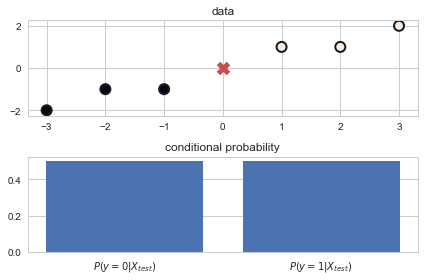

In [6]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

- 'X'자로 표시된건 테스트 데이터!!
- 아래의 barplot은 이 테스트 데이터가 어느 클래스에 속할지 조건부 확률로 나타낸 것.
- 정중앙이므로 각각 0.5가 나오게 되는데, 하나를 선택해야하는 분류에서는 이 경우 y=1을 선택한다. 

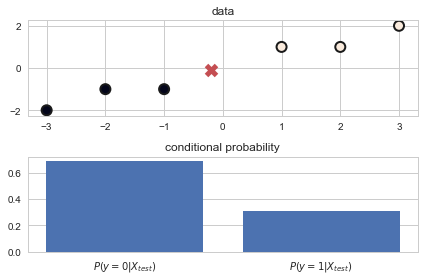

In [7]:
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

테스트 데이터를 y=0인 클래스 쪽으로 가깝게 하면, 조건부 확률이 올라가는 것을 볼 수 있다.

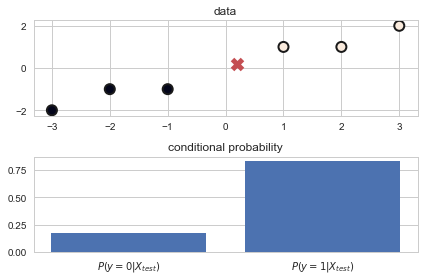

In [8]:
x = [[0.2, 0.2]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

반대의 경우도 같다.

### 나이브 베이지안 모형
- 클래스가 3개 이상일 때 사용하는 생성모형
- train 데이터로 fit을 시키고, test데이터를 predict하면 어떤 카테고리에 속할지 카테고리 번호가 반환됨.
- predict_proba() : test데이터가 각 카테고리에 속할 확률을 보여줌(predict에서 반환된 카테고리 번호의 확률이 가장 크게 나오겠지)

- TfidfVectorizer 전처리기 : 텍스트 데이터를 실수 벡터로 변환
- MultinomialNB 모형 : 나이브 베이즈 방법으로 분류문제 예측
- 이 두개를 pipeline으로 합쳐서 일반적인 모형처럼 만들고, fit, predict사용

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

n = 1
x = news.data[n:n + 1]
y = model.predict(x)[0]

In [15]:
y # x는 3번 카테고리에 속할 가능성이 가장 높다.

3

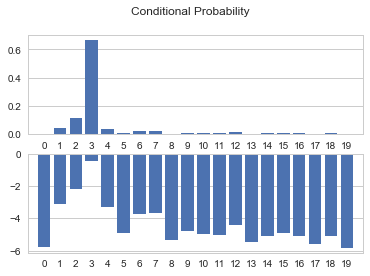

In [16]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.suptitle("Conditional Probability")
plt.show()

### 로지스틱 회귀모형
- $ p(y=C_1∣x)=f(x) $ 을 가정
- f(x)를 직접 찾아내는 방법
- 나뉘는 기준점 a를 찾는게 목적 (f(x) = a)

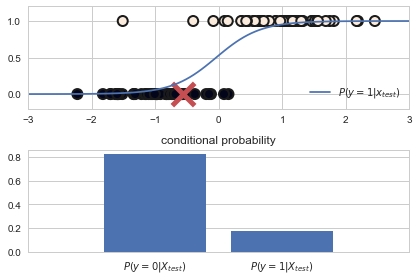

In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(X0[0], model.predict(X0[:1]), marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[:1])[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("conditional probability")
plt.tight_layout()
plt.show()

- 기본적으로 binary classification(기본적으로 클래스를 두 종류밖에 못둔다.)
- f(x)가 0.5를 기준으로 클래스가 나뉘는 것을 볼 수 있다.
- 여기서 나뉘는 기준점을 찾는게 로지스틱 회귀모형에서 지향하는 목적

### 퍼셉트론
- 데이터 영역을 나누는 경계선(함수)을 구한다.
- f(x) = 0을 경계선함수로 하여 판별함수의 부호로 클래스가 나뉜다.

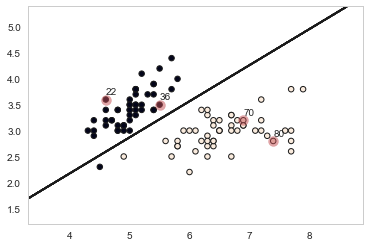

In [18]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.grid(False)
plt.show()

위 그림의 검은 직선이 판별함수

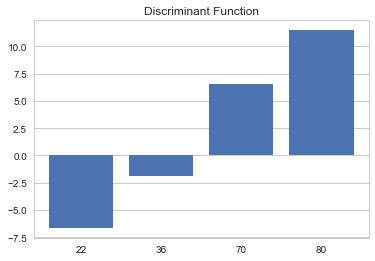

In [19]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()

위 그래프의 세로축에서 판별함수 f(x)=0을 기준으로 나뉜다.

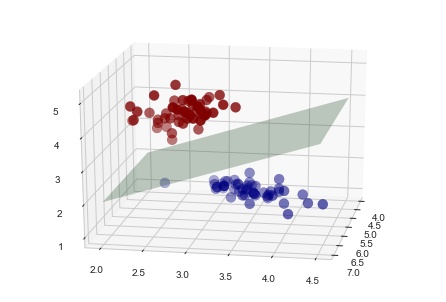

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet);
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3)
plt.show()

3차원에서는 경계선이 아닌 경계면을 가진다.(하이퍼 플레인, decision hyperplane)

### 커널 SVM
- 복잡한 형태의 경계선(판별함수) 생성가능

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


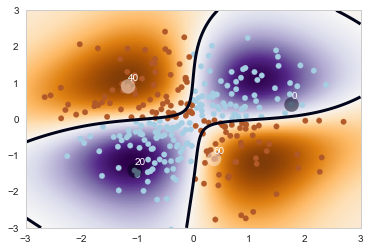

In [21]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.show()

곡선이 가능하다.

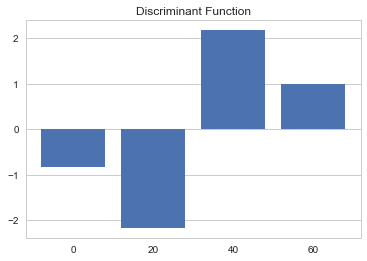

In [22]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()

마찬가지로 위 그래프의 세로축에서 판별함수 f(x)=0을 기준으로 나뉜다.